In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_trajectory(X_i, T, k):
    """
    Extrait les T points de la k-ième trajectoire et renvoie la transposée.

    Paramètres :
    -----------
    X_i : numpy.ndarray
        Matrice contenant toutes les trajectoires, de dimension (n, T*N).
    T : int
        Nombre de points par trajectoire.
    k : int
        Index de la trajectoire à extraire (commence à 0 pour la première).

    Retourne :
    --------
    numpy.ndarray
        La transposée des T points de la k-ième trajectoire, de dimension (T, n).
    """
    start_idx = k * T  # Début de la k-ième trajectoire
    end_idx = start_idx + T  # Fin de la k-ième trajectoire (exclus)
    return X_i[:, start_idx:end_idx].T  # Renvoie la transposée


In [3]:

n = 3
p = 2

# Nominal system

A_0 = np.array([[0.6, 0.5, 0.4],
                [0.0, 0.4, 0.3],
                [0.0, 0.0, 0.3]])

B_0 = np.array([[1.0, 0.5],
                [0.5, 1.0],
                [0.5, 0.5]])

# Modification patterns
V = np.array([[0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0]])

U = np.array([[1.0, 0.0],
              [0.0, 0.0],
              [0.0, 1.0]])

# Noise level, input signal and initial state
sigu = 1
sigw = 1
sigx = 1

epsilon = 0.1
M = 25

In [4]:
from syssim import syssim 
from sysgen import sysgen

In [5]:
A_list,B_list = sysgen(A_0, B_0, V, U, M, epsilon)

In [6]:
A_0.shape[0]
B_list[0].shape[0]

3

In [7]:
N = 5 ; T = 25 ; k = 0
X_i, Z_i, W_i,list_x0 = syssim(A_list, B_list, T, N, k, sigu, sigw, sigx)

In [8]:
trajectory= get_trajectory(X_i,25,0)

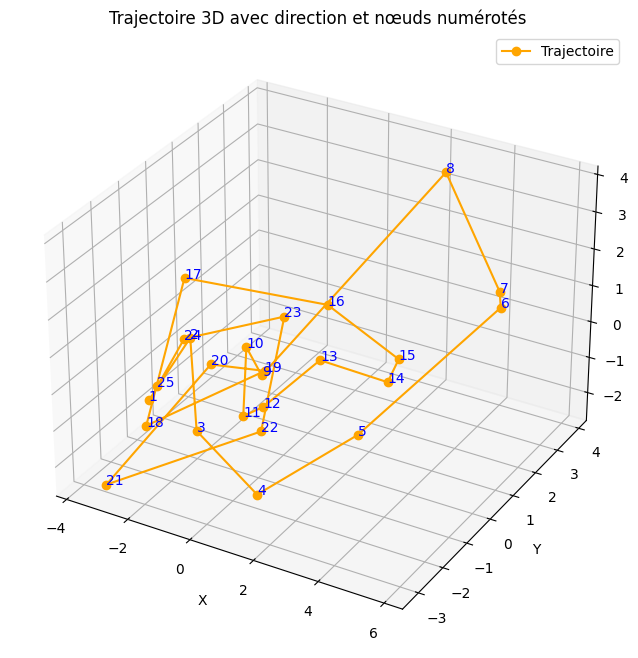

In [9]:
#Création du graphique 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Coordonnées
x, y, z = trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]

# Tracé de la trajectoire
ax.plot(x, y, z, marker='o', label='Trajectoire', color='orange')

# Ajout des flèches pour la direction
# for i in range(len(x) - 1):
#     ax.quiver(x[i], y[i], z[i], x[i + 1] - x[i], y[i + 1] - y[i], z[i + 1] - z[i],
#               color='y', arrow_length_ratio=0.05)

# Ajout des numéros aux nœuds
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'{i + 1}', color='b', fontsize=10)

# Labels et titre
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectoire 3D avec direction et nœuds numérotés')
ax.legend()

# Affichage
plt.show()

In [10]:

from sysgen import sysgen 

A, B = sysgen(A_0, B_0, V, U, M, epsilon)